In [1]:
import pandas as pd

# Load your dataset
df = pd.read_csv('C:/Users/jaag1/Documents/retail_sales_dataset.csv')  # Update with your actual dataset file path

# Explore the dataset
print(df.head())
print(df.info())
print(df.describe())

# Handle missing data
df = df.dropna()  # You can also use other imputation techniques if needed

# Handle any inconsistent data (e.g., fixing data types)
df['Date'] = pd.to_datetime(df['Date'])


   Transaction ID        Date Customer ID  Gender  Age Product Category  \
0               1  2023-11-24     CUST001    Male   34           Beauty   
1               2  2023-02-27     CUST002  Female   26         Clothing   
2               3  2023-01-13     CUST003    Male   50      Electronics   
3               4  2023-05-21     CUST004    Male   37         Clothing   
4               5  2023-05-06     CUST005    Male   30           Beauty   

   Quantity  Price per Unit  Total Amount  
0         3              50           150  
1         2             500          1000  
2         1              30            30  
3         1             500           500  
4         2              50           100  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   obj

In [3]:
# Calculate key metrics
average_purchase_value = df['Total Amount'].mean()
purchase_frequency = df['Customer ID'].value_counts().mean()
total_customers = df['Customer ID'].nunique()

print(f'Average Purchase Value: {average_purchase_value}')
print(f'Average Purchase Frequency: {purchase_frequency}')
print(f'Total Number of Customers: {total_customers}')


Average Purchase Value: 456.0
Average Purchase Frequency: 1.0
Total Number of Customers: 1000


In [5]:
# Calculate key metrics
average_purchase_value = df['Total Amount'].mean()
purchase_frequency = df['Customer ID'].value_counts().mean()
total_customers = df['Customer ID'].nunique()

print(f'Average Purchase Value: {average_purchase_value}')
print(f'Average Purchase Frequency: {purchase_frequency}')
print(f'Total Number of Customers: {total_customers}')


Average Purchase Value: 456.0
Average Purchase Frequency: 1.0
Total Number of Customers: 1000


C:\Users\jaag1\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\jaag1\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\jaag1\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\jaag1\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\jaag1\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreatePro

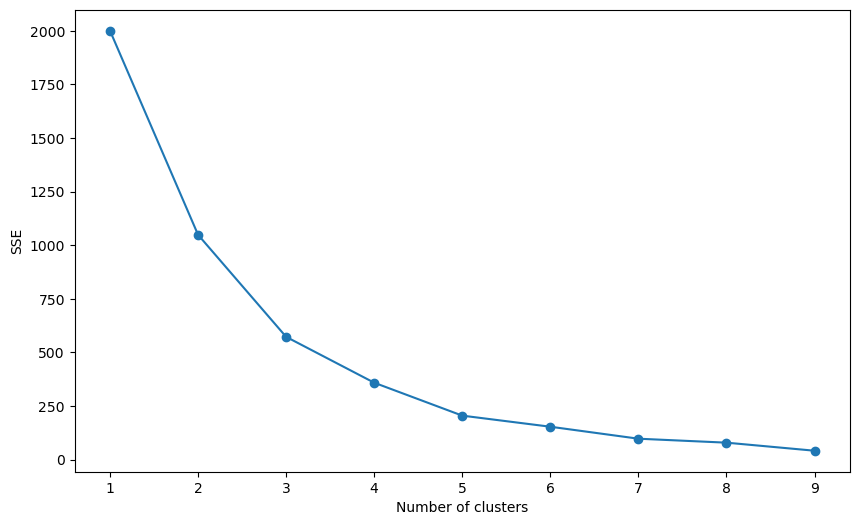

C:\Users\jaag1\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Selecting relevant columns for clustering
df_selected = df[['Customer ID', 'Quantity', 'Total Amount']]

# Normalizing the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_selected[['Quantity', 'Total Amount']])

# Determining the optimal number of clusters
sse = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    sse.append(kmeans.inertia_)

# Plotting the elbow method
plt.figure(figsize=(10, 6))
plt.plot(range(1, 10), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

# Applying K-means
optimal_clusters = 3  # Adjust based on the elbow plot
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df['segment'] = kmeans.fit_predict(df_scaled)


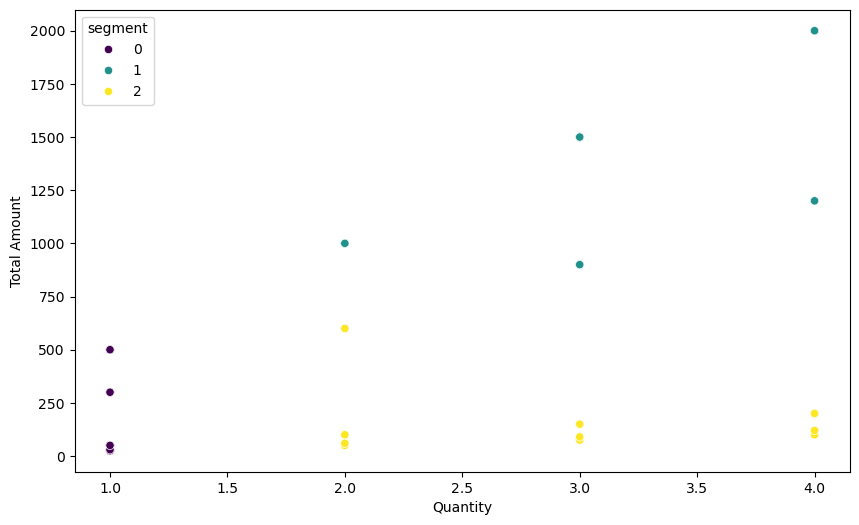

In [9]:
# Visualizing the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Quantity', y='Total Amount', hue='segment', data=df, palette='viridis')
plt.show()



In [15]:
# Analyzing segment characteristics
# Select only numeric columns for aggregation
numeric_columns = df.select_dtypes(include='number').columns
segment_summary = df.groupby('segment')[numeric_columns].mean()
print(segment_summary)

# Calculate the average purchase value across all customers
average_purchase_value = df['Total Amount'].mean()

# Insights and recommendations
for segment, data in segment_summary.iterrows():
    if data['Total Amount'] > average_purchase_value:
        print(f'Segment {segment} consists of high-spending customers. Consider offering loyalty programs to retain them.')
    else:
        print(f'Segment {segment} consists of low-spending customers. Consider upsell opportunities or bundle offers to increase spend.')


         Transaction ID        Age  Quantity  Price per Unit  Total Amount  \
segment                                                                      
0            525.142292  41.557312  1.000000      177.094862    177.094862   
1            468.844697  40.140152  3.204545      412.121212   1297.727273   
2            504.894410  41.989648  2.929607       54.420290    142.018634   

         segment  
segment           
0            0.0  
1            1.0  
2            2.0  
Segment 0 consists of low-spending customers. Consider upsell opportunities or bundle offers to increase spend.
Segment 1 consists of high-spending customers. Consider offering loyalty programs to retain them.
Segment 2 consists of low-spending customers. Consider upsell opportunities or bundle offers to increase spend.
